In [1]:
# Chargement des librairies Pandas, Network et folium
'''Code realise par Fatou DIOUF'''
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import folium

%matplotlib inline


In [2]:
# Utilisation la bibliothéque pandas pour lire le fichier transport-nodes.csv
donnee = pd.read_csv('transport-nodes.csv')
print(donnee)


                  id   latitude  longitude  population
0          Amsterdam  52.379189   4.899431      821752
1            Utrecht  52.092876   5.104480      334176
2           Den Haag  52.078663   4.288788      514861
3          Immingham  53.612390  -0.222190        9642
4          Doncaster  53.522850  -1.131160      302400
5   Hoek van Holland  51.977500   4.133330        9382
6         Felixstowe  51.963750   1.351100       23689
7            Ipswich  52.059170   1.155450      133384
8         Colchester  51.889210   0.904210      104390
9             London  51.509865  -0.118092     8787892
10         Rotterdam  51.922500   4.479170      623652
11             Gouda  52.016670   4.708330       70939


In [3]:
# Utilisez la bibliothéque pandas pour lire le fichier transport-relationships.csv
donnee2 = pd.read_csv('transport-relationships.csv')
print(donnee2)


                 src               dst relationship  cost
0          Amsterdam           Utrecht        EROAD    46
1          Amsterdam          Den Haag        EROAD    59
2           Den Haag         Rotterdam        EROAD    26
3          Amsterdam         Immingham        EROAD   369
4          Immingham         Doncaster        EROAD    74
5          Doncaster            London        EROAD   277
6   Hoek van Holland          Den Haag        EROAD    27
7         Felixstowe  Hoek van Holland        EROAD   207
8            Ipswich        Felixstowe        EROAD    22
9         Colchester           Ipswich        EROAD    32
10            London        Colchester        EROAD   106
11             Gouda         Rotterdam        EROAD    25
12             Gouda           Utrecht        EROAD    35
13          Den Haag             Gouda        EROAD    32
14  Hoek van Holland         Rotterdam        EROAD    33


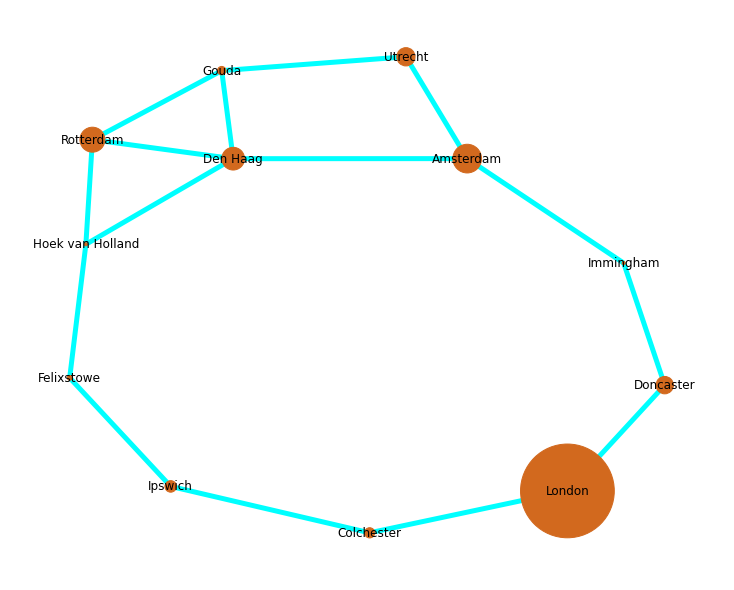

In [4]:
# Construisez le graphe et le visualiser avec la fonction from_pandas_dataframe de networkx
graphe = nx.Graph()
donnees2 = donnee2[['src', 'dst']]
graphe = nx.from_pandas_edgelist(donnees2, 'src', 'dst')
plt.figure(figsize=(10, 8))
nodeSize = []

for node in graphe.nodes:
    i = 0
    for id in donnee.id:
        if id == node:
            nodeSize.append(donnee.population[i]/1000)
        i += 1

nx.draw(graphe, with_labels=True, node_color='chocolate',
        node_size=nodeSize, edge_color='cyan', width=5)

plt.show()




In [5]:
def ajouterAttribut(myGraphe,dfnode, nameAttr, Index):
    node = dfnode[[Index,nameAttr]]
    nodes = node.set_index(Index).to_dict('index')
    nx.set_node_attributes(myGraphe, nodes)
    
ajouterAttribut(graphe,donnee,'latitude','id')
ajouterAttribut(graphe,donnee,'longitude','id')
ajouterAttribut(graphe,donnee,'population','id')
dict(graphe.nodes.data())

{'Amsterdam': {'latitude': 52.379189,
  'longitude': 4.899431,
  'population': 821752},
 'Utrecht': {'latitude': 52.092876,
  'longitude': 5.10448,
  'population': 334176},
 'Den Haag': {'latitude': 52.078663,
  'longitude': 4.288788,
  'population': 514861},
 'Rotterdam': {'latitude': 51.9225,
  'longitude': 4.47917,
  'population': 623652},
 'Immingham': {'latitude': 53.61239,
  'longitude': -0.22219,
  'population': 9642},
 'Doncaster': {'latitude': 53.52285,
  'longitude': -1.13116,
  'population': 302400},
 'London': {'latitude': 51.509865,
  'longitude': -0.118092,
  'population': 8787892},
 'Hoek van Holland': {'latitude': 51.9775,
  'longitude': 4.13333,
  'population': 9382},
 'Felixstowe': {'latitude': 51.96375,
  'longitude': 1.3511,
  'population': 23689},
 'Ipswich': {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384},
 'Colchester': {'latitude': 51.88921,
  'longitude': 0.90421,
  'population': 104390},
 'Gouda': {'latitude': 52.01667, 'longitude': 4.70833,

In [6]:
myGraphe = set()
def parcoursDFS(myGraphe, noeudSRC, noeudDST):
    """Trouver un parcours DFS entre noeudSRC et noeudDST"""
    if noeudDST not in myGraphe:
        print(noeudDST)
        myGraphe.add(noeudDST)
        for neighbour in noeudSRC[noeudDST]:
            parcoursDFS(myGraphe, noeudSRC, neighbour)
            
parcoursDFS(myGraphe, graphe, 'Utrecht')

Utrecht
Amsterdam
Den Haag
Rotterdam
Gouda
Hoek van Holland
Felixstowe
Ipswich
Colchester
London
Doncaster
Immingham


In [ ]:
def parcoursBFS(myGraphe, noeudSRC, noeudDST):
    queue = []
    myGraphe.append(noeudDST)
    queue.append(noeudDST)

    while queue:
        sommet = queue.pop(0)
        print(sommet, end="\n")
        for neighbour in noeudSRC[sommet]:
            if neighbour not in myGraphe:
                myGraphe.append(neighbour)
                queue.append(neighbour)
            
myGraphe = []    
parcoursBFS(myGraphe, graphe, 'Utrecht')


Utrecht
Amsterdam
Gouda
Den Haag
Immingham
Rotterdam
Hoek van Holland
Doncaster
Felixstowe
London
Ipswich
Colchester
